In [1]:
import xscen as xs
import xarray as xr
import cartopy.crs as ccrs
from xscen.config import CONFIG
import figanos.matplotlib as fg
import matplotlib.pyplot as plt
fg.utils.set_mpl_style('ouranos')

# Load configuration
xs.load_config(
    "../paths_obs.yml", "../config_obs.yml", verbose=(__name__ == "__main__"), reset=True
)

In [2]:
pcat = xs.ProjectCatalog(CONFIG["paths"]["project_catalog"])
pcat.df

,id,type,processing_level,bias_adjust_institution,bias_adjust_project,mip_era,activity,driving_model,institution,source,...,member,xrfreq,frequency,variable,domain,date_start,date_end,version,format,path
0,ECMWF_ERA5-Land_NAM_reconstruction,reconstruction,extracted,NaN,NaN,NaN,NaN,NaN,ECMWF,ERA5-Land,...,NaN,D,day,"(pr, tasmin, tas, tasmax)",Quebec,1980-01-01,2021-12-31,NaN,zarr,/tank/jlavoie/abuyalo/obsflow/extracted/ECMWF_...
1,GovCan_RDRS_NAM_reconstruction,reconstruction,extracted,NaN,NaN,NaN,NaN,NaN,GovCan,RDRS,...,NaN,D,day,"(pr, tasmin, tas, tasmax)",Quebec,1980-01-01,2018-12-31,v21,zarr,/tank/jlavoie/abuyalo/obsflow/extracted/GovCan...
2,GovCan_CaSR_NAM_reconstruction,reconstruction,extracted,NaN,NaN,NaN,NaN,NaN,GovCan,CaSR,...,NaN,D,day,"(pr, tasmin, tas, tasmax)",Quebec,1980-01-01,2023-12-31,v31,zarr,/tank/jlavoie/abuyalo/obsflow/extracted/GovCan...
3,USask_EMDNA_OI_NAM_reconstruction,reconstruction,extracted,NaN,NaN,NaN,NaN,NaN,USask,EMDNA,...,OI,D,day,"(pr, tasmin, tas, tasmax)",Quebec,1980-01-01,2018-12-31,v10,zarr,/tank/jlavoie/abuyalo/obsflow/extracted/USask_...
4,PCIC_PCICBlend_CAN_reconstruction,reconstruction,extracted,NaN,NaN,NaN,NaN,NaN,PCIC,PCICBlend,...,NaN,D,day,"(pr, tasmin, tas, tasmax)",Quebec,1980-01-01,2012-12-31,v1,zarr,/tank/jlavoie/abuyalo/obsflow/extracted/PCIC_P...
5,GovCan_AHCCD_CAN_station-tas,station-tas,extracted,NaN,NaN,NaN,NaN,NaN,GovCan,AHCCD,...,NaN,D,day,"(tasmin, tas, tasmax)",Quebec,1980-01-01,2023-12-31,gen3,zarr,/tank/jlavoie/abuyalo/obsflow/extracted/GovCan...
6,GovCan_AHCCD_CAN_station-pr,station-pr,extracted,NaN,NaN,NaN,NaN,NaN,GovCan,AHCCD,...,NaN,D,day,"(pr,)",Quebec,1980-01-01,2017-12-31,gen2,zarr,/tank/jlavoie/abuyalo/obsflow/extracted/GovCan...
7,ECMWF_ERA5-Land_NAM_reconstruction,reconstruction,indicators,NaN,NaN,NaN,NaN,NaN,ECMWF,ERA5-Land,...,NaN,QS-DEC,qtr,"(tg_mean_seasonal, pr_mean_seasonal)",Quebec,1980-03-01,2021-12-01,NaN,zarr,/tank/jlavoie/abuyalo/obsflow/indicators/ECMWF...
8,GovCan_AHCCD_CAN_station-pr,station-pr,indicators,NaN,NaN,NaN,NaN,NaN,GovCan,AHCCD,...,NaN,QS-DEC,qtr,"(pr_mean_seasonal,)",Quebec,1980-03-01,2017-12-01,gen2,zarr,/tank/jlavoie/abuyalo/obsflow/indicators/GovCa...
9,GovCan_AHCCD_CAN_station-tas,station-tas,indicators,NaN,NaN,NaN,NaN,NaN,GovCan,AHCCD,...,NaN,QS-DEC,qtr,"(tg_mean_seasonal,)",Quebec,1980-03-01,2023-12-01,gen3,zarr,/tank/jlavoie/abuyalo/obsflow/indicators/GovCa...


In [16]:
def plot_missing_percentage(processing_level):
    dict_ext = pcat.search(processing_level=processing_level).to_dataset_dict()

    for id, ds in dict_ext.items():
        if ds.attrs['cat:type'] == 'reconstruction':
            plotting_function = fg.gridmap
        else:
            plotting_function = fg.scattermap

        for var in ds.data_vars:
            var_ds = ds[var]
            coords = var_ds.coords

            if 'lat' in coords and 'lon' in coords and 'time' in coords:
                # Count missing values and compute percentage
                missing_counts = var_ds.isnull().sum(dim='time', skipna=True)
                total_counts = var_ds['time'].size
                percent_missing = (missing_counts / total_counts) * 100

                # Hide fully-missing points by assigning 0%
                #percent_missing = percent_missing.where(missing_counts < total_counts, other=0)

                title_str = f"{id} - {var} - Missing data (% of {total_counts} timesteps)"

                if 'season' in coords:
                    ax = plotting_function(
                        percent_missing,
                        projection=ccrs.LambertConformal(),
                        fig_kw={"figsize": (20, 5)},
                        plot_kw={"col": "season"},
                        features=["coastline"],
                        show_time=False,
                        frame=False,
                        use_attrs={"suptitle": title_str},
                        enumerate_subplots=True
                    )
                else:
                    ax = plotting_function(
                        percent_missing,
                        show_time=False,
                        features=["coastline"]
                    )
                    ax.set_title(title_str, fontsize=14)



--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'


/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "units" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "long_name" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "units" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "long_name" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "units" not found.
/exec/abuyalo/

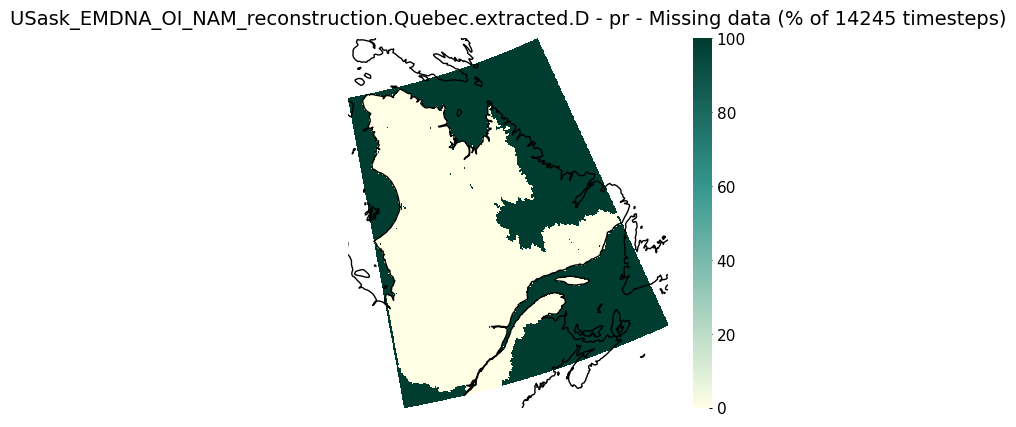

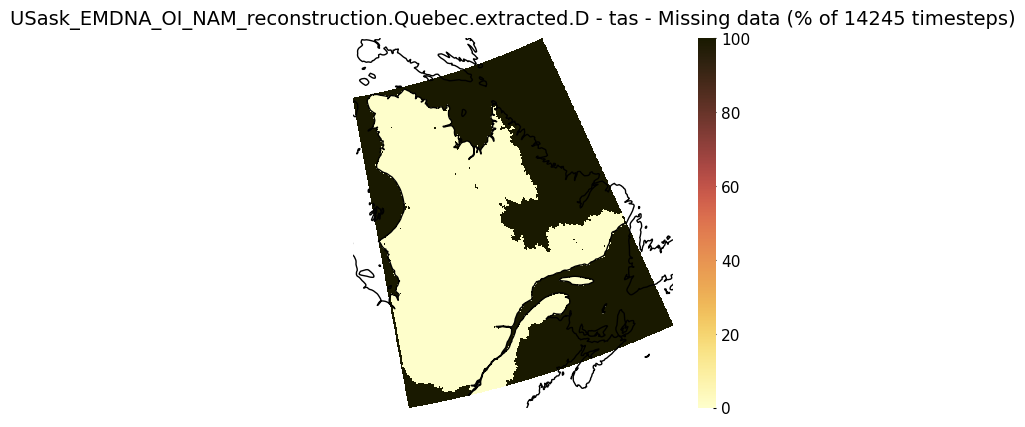

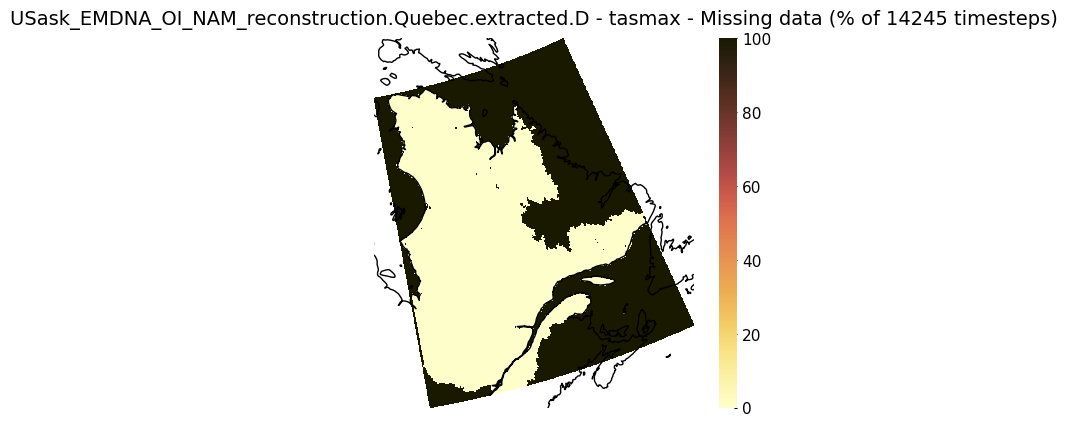

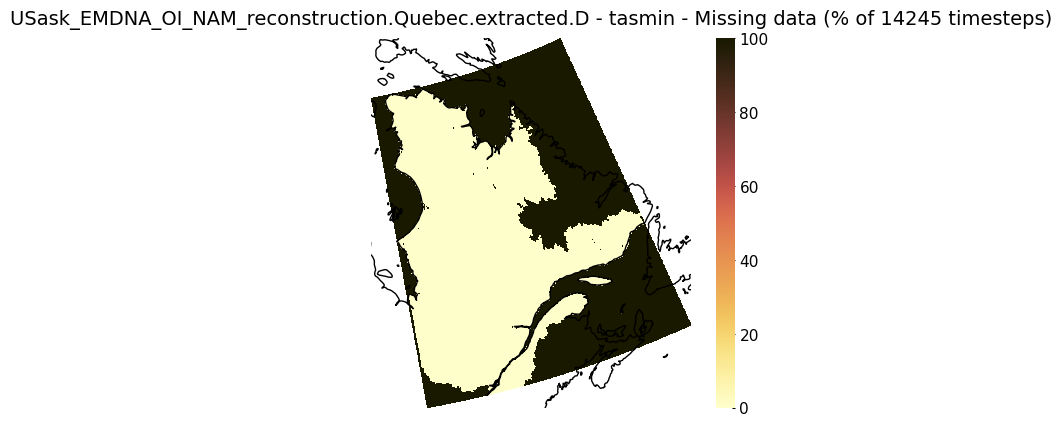

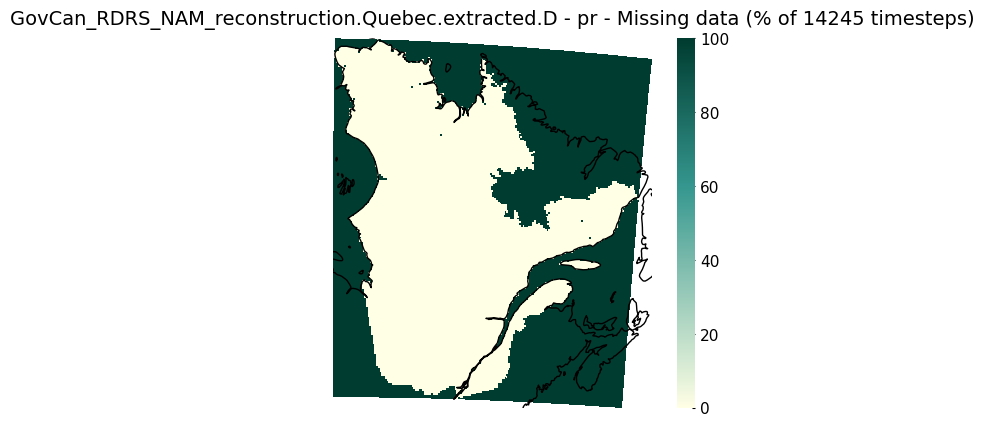

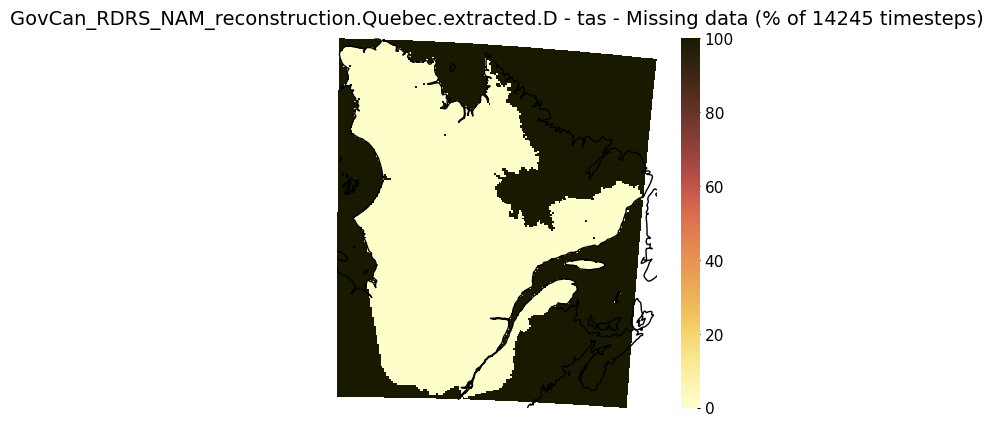

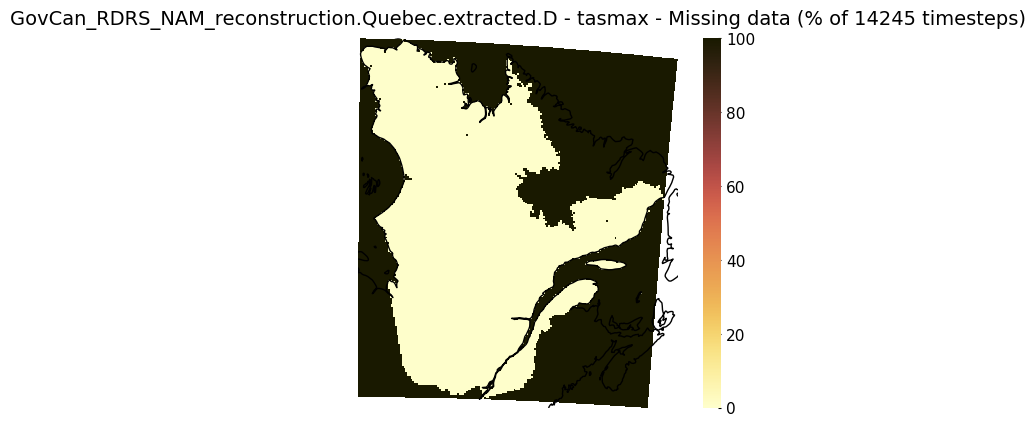

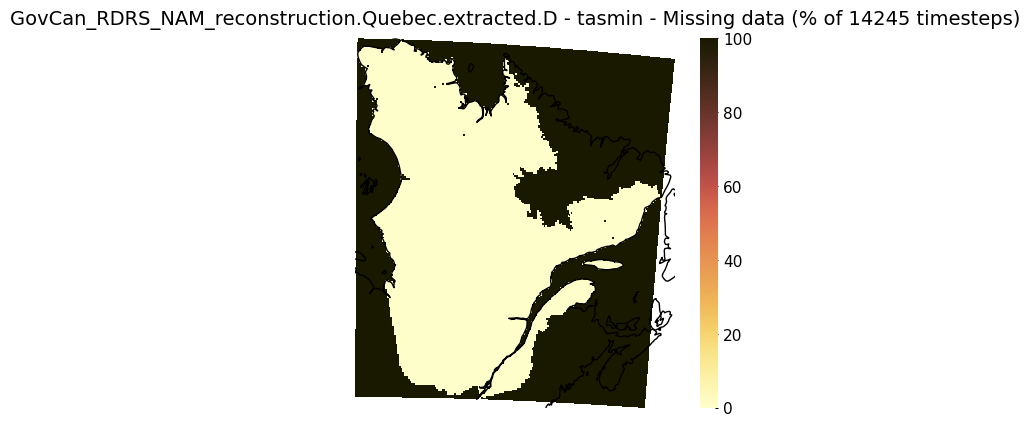

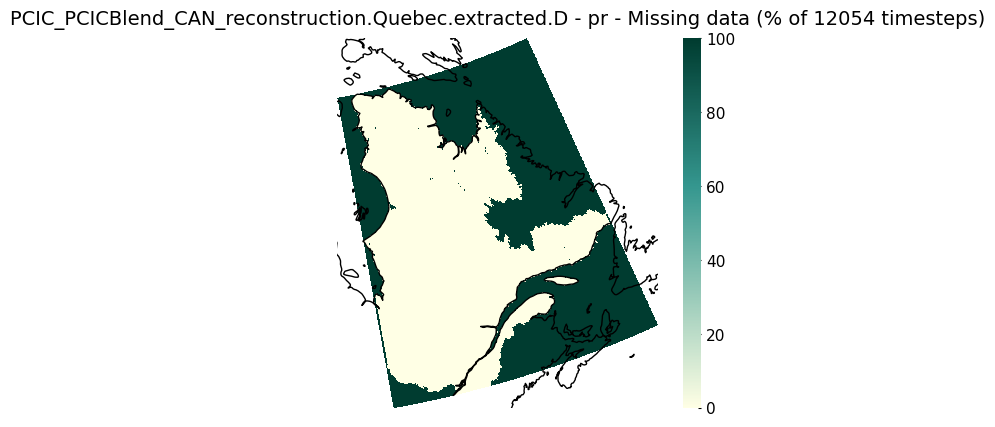

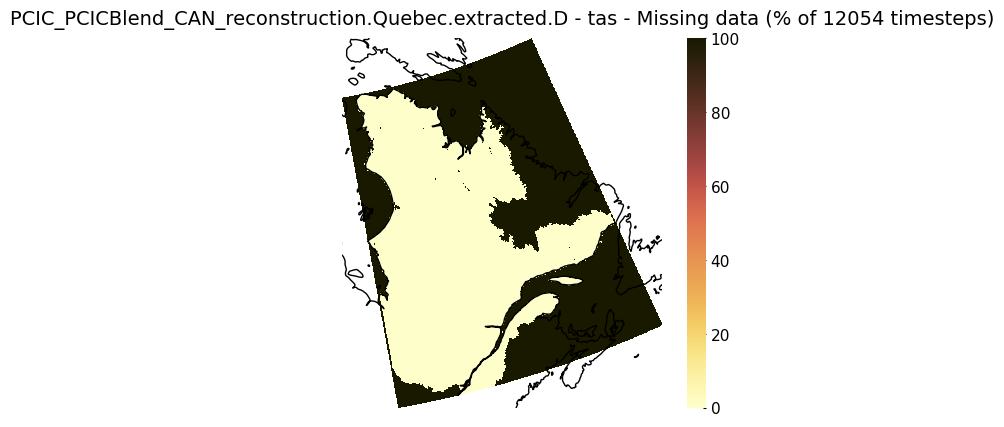

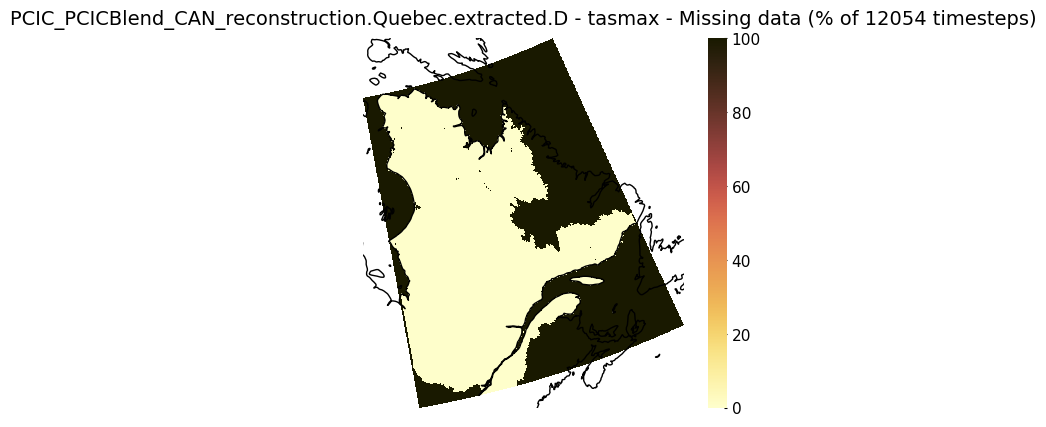

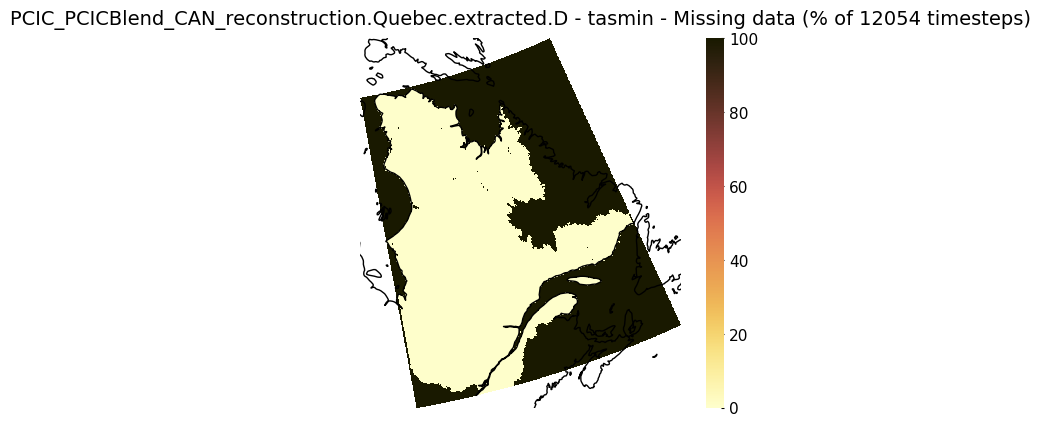

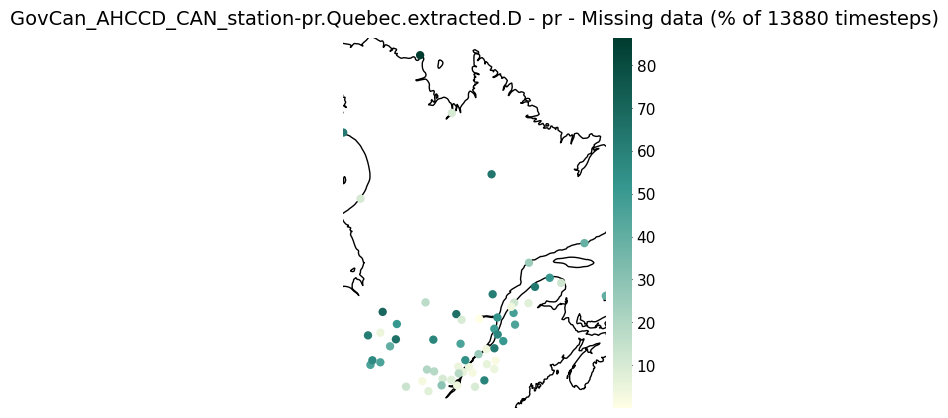

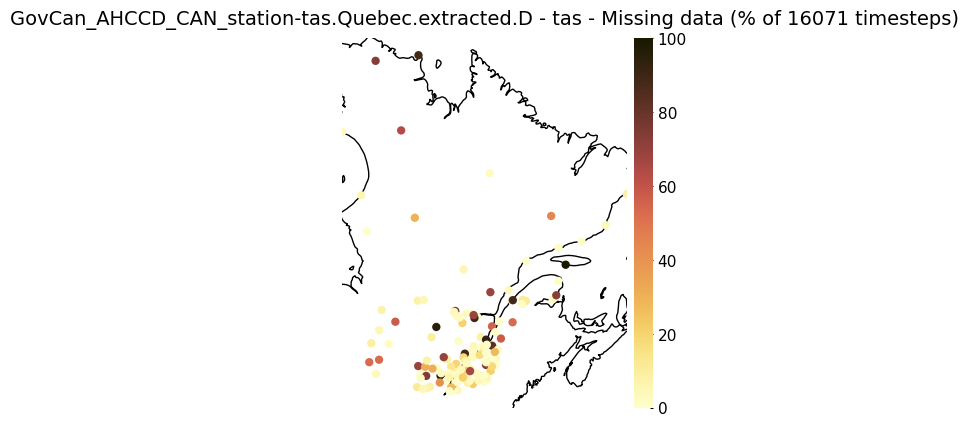

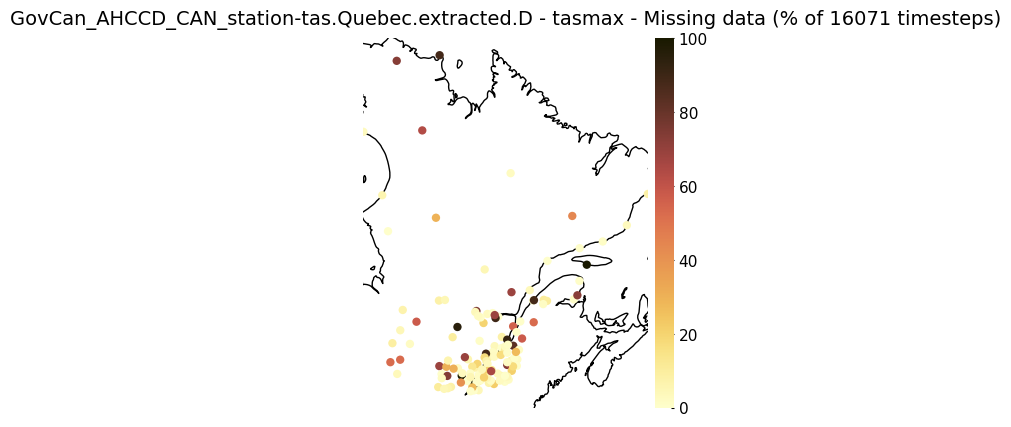

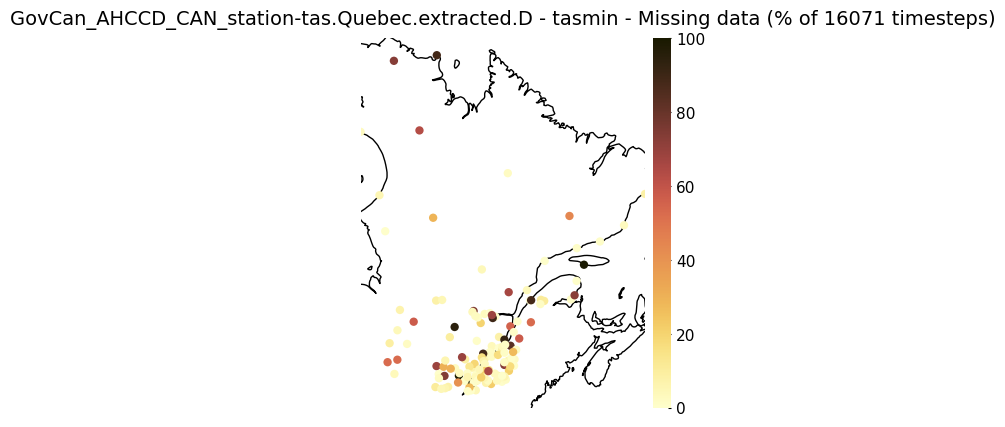

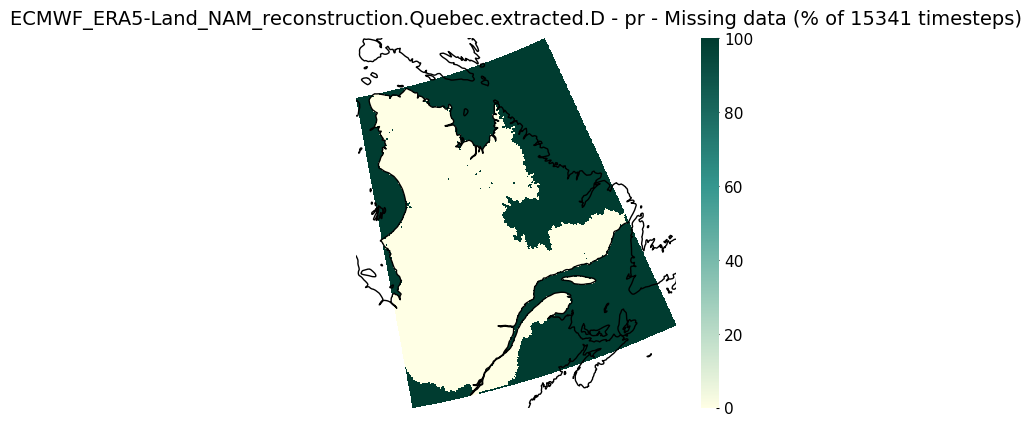

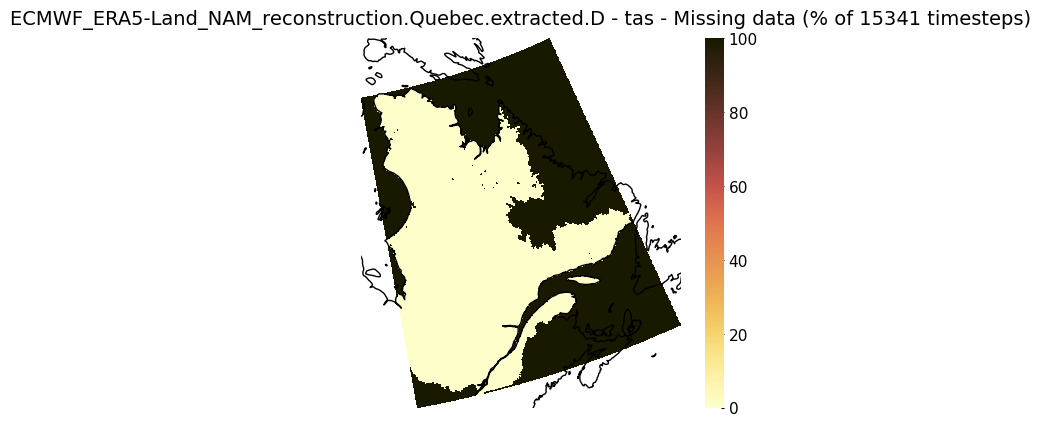

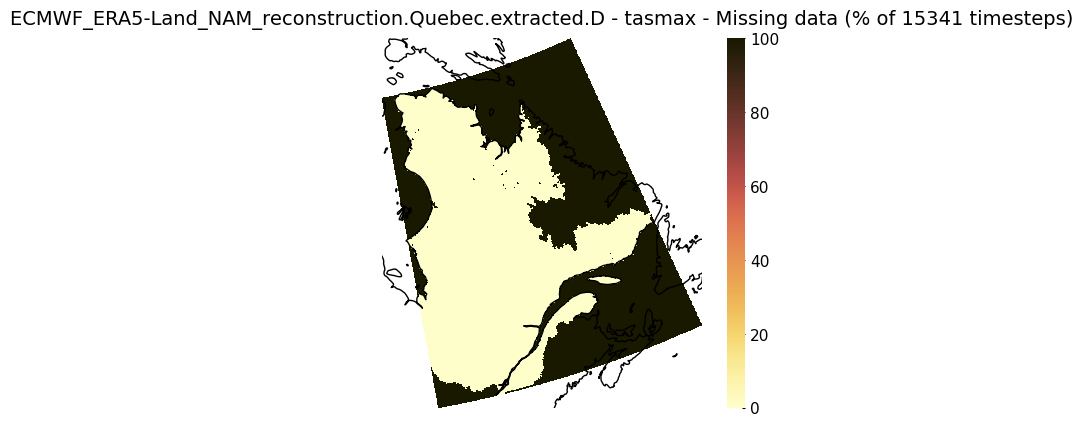

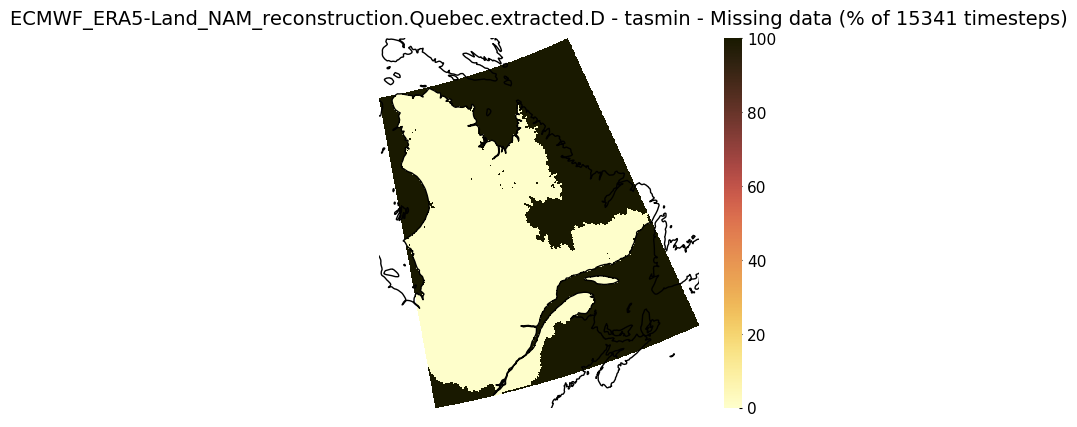

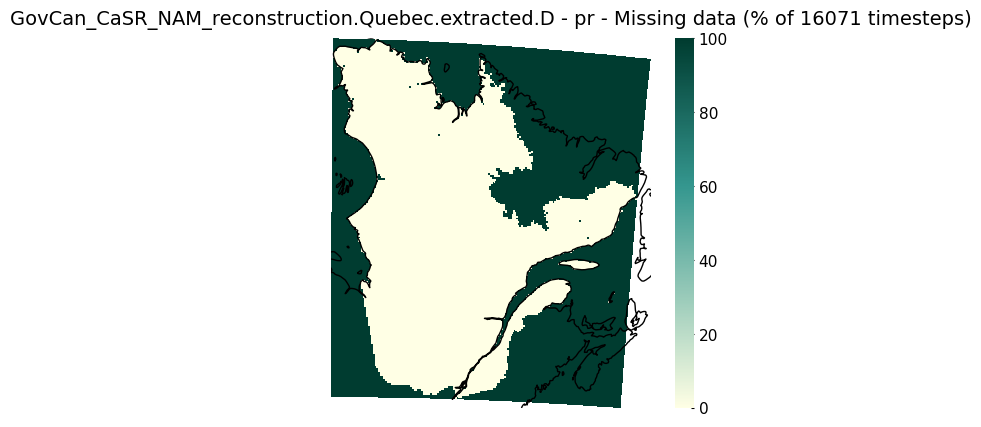

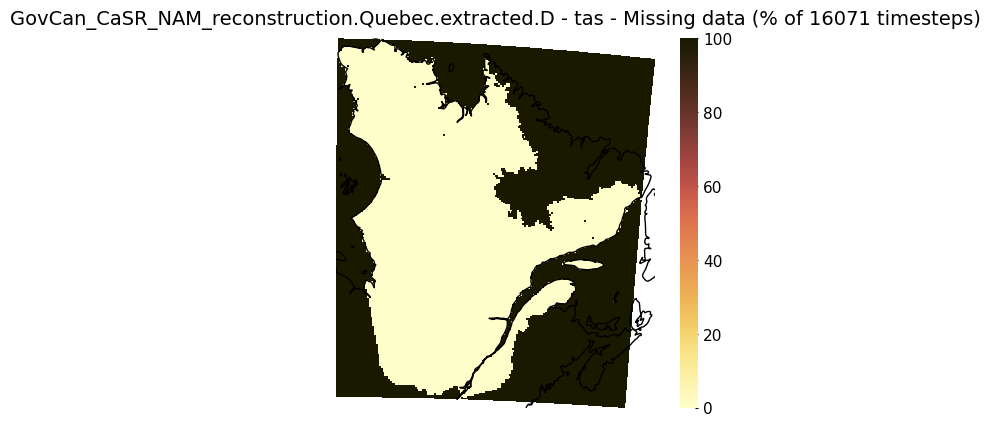

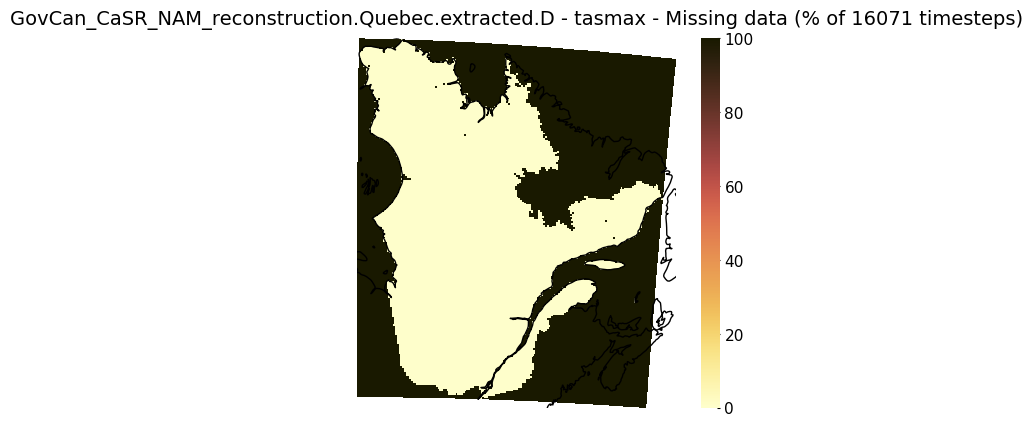

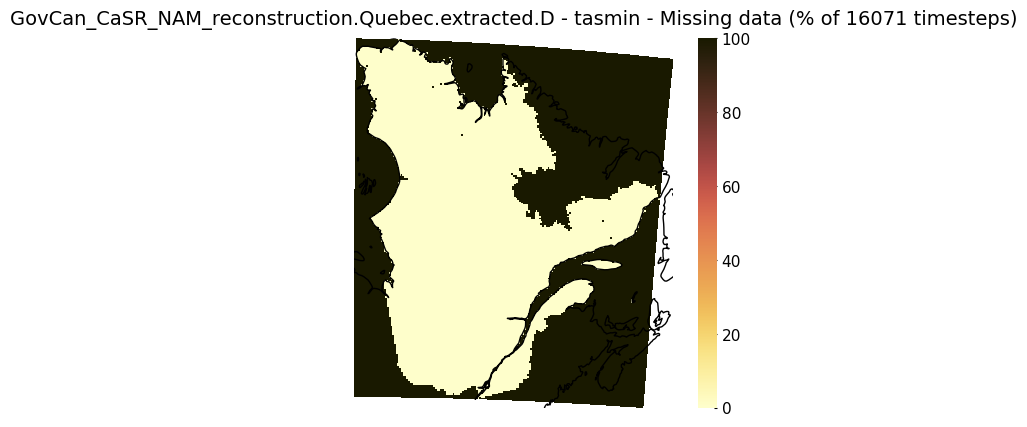

In [17]:
plot_missing_percentage(processing_level='extracted')


--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'


/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "units" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "long_name" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "units" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "long_name" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "description" not found.
/exec/abuyalo/.conda/envs/obsflow/lib/python3.12/site-packages/figanos/matplotlib/utils.py:227: UserWarning: Attribute "units" not found.
/exec/abuyalo/

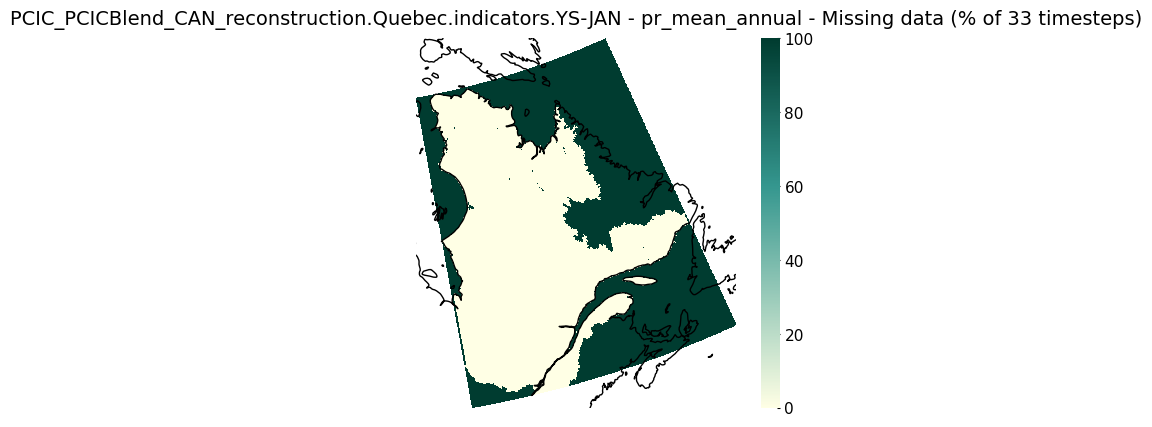

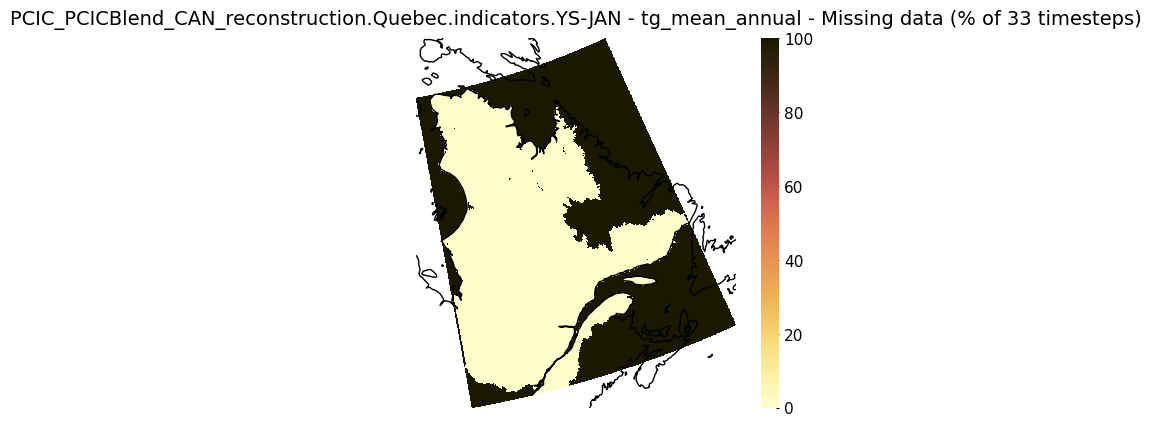

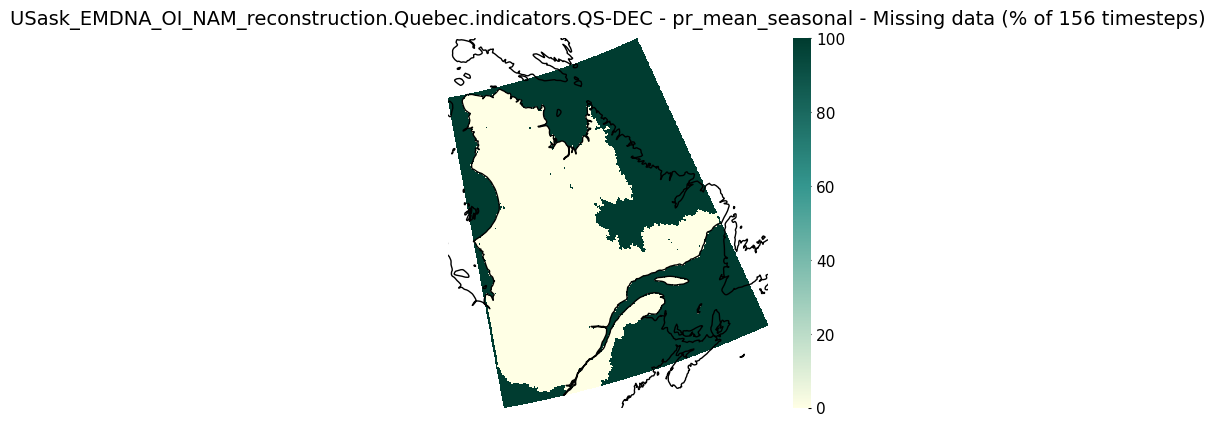

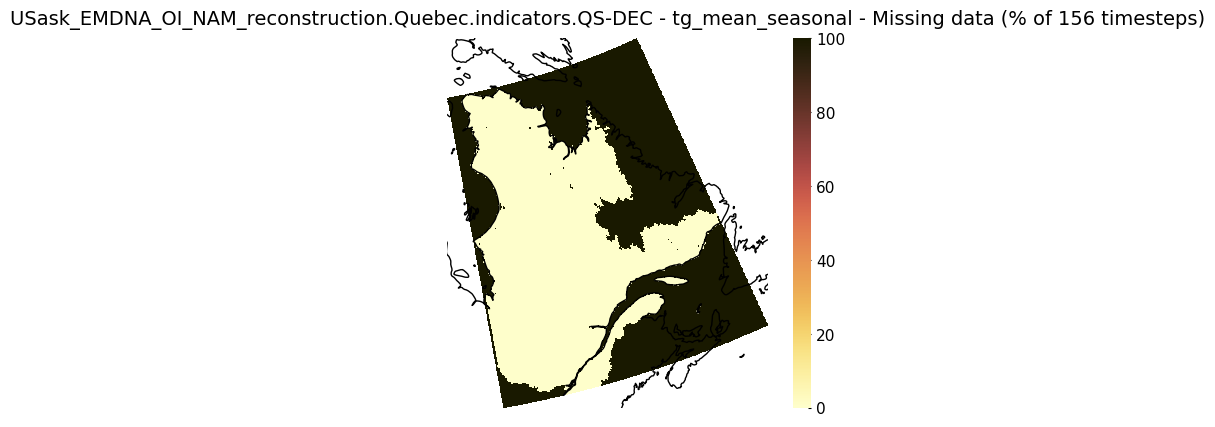

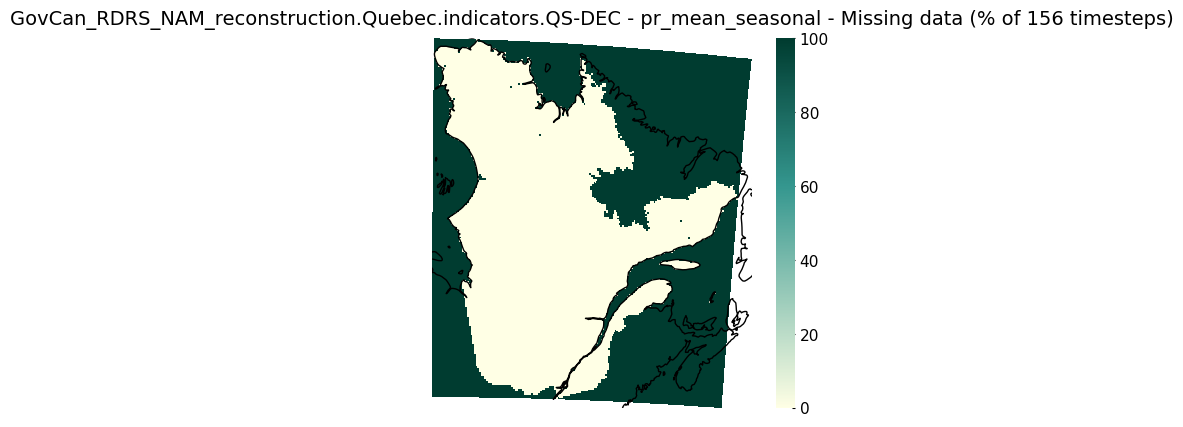

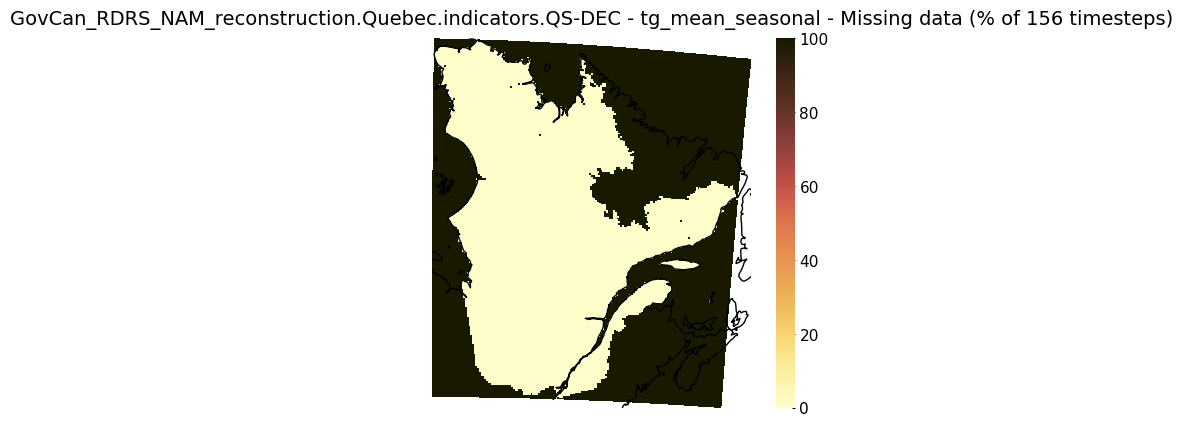

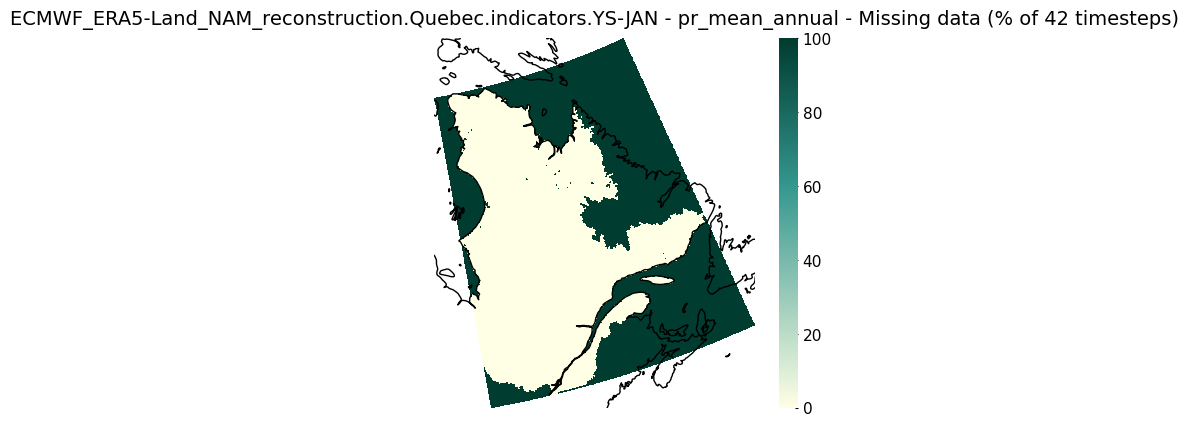

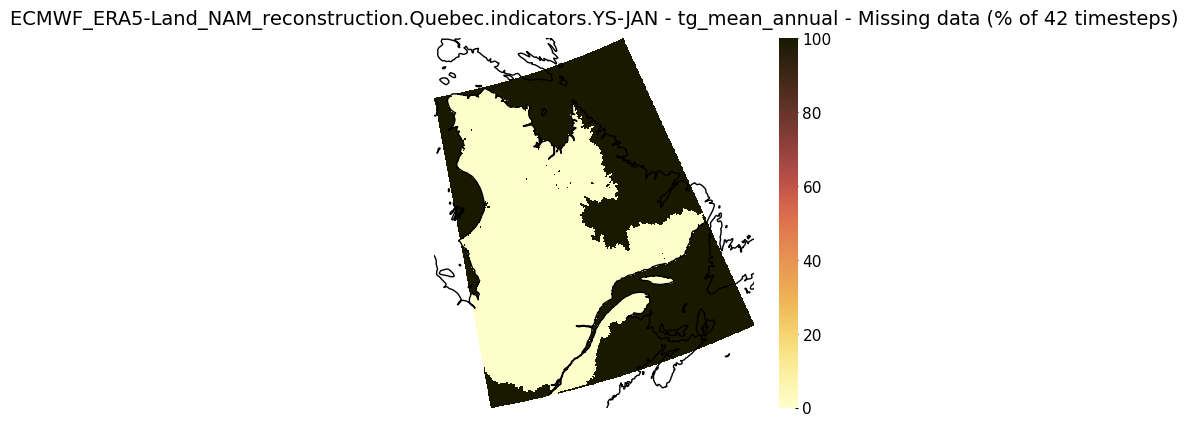

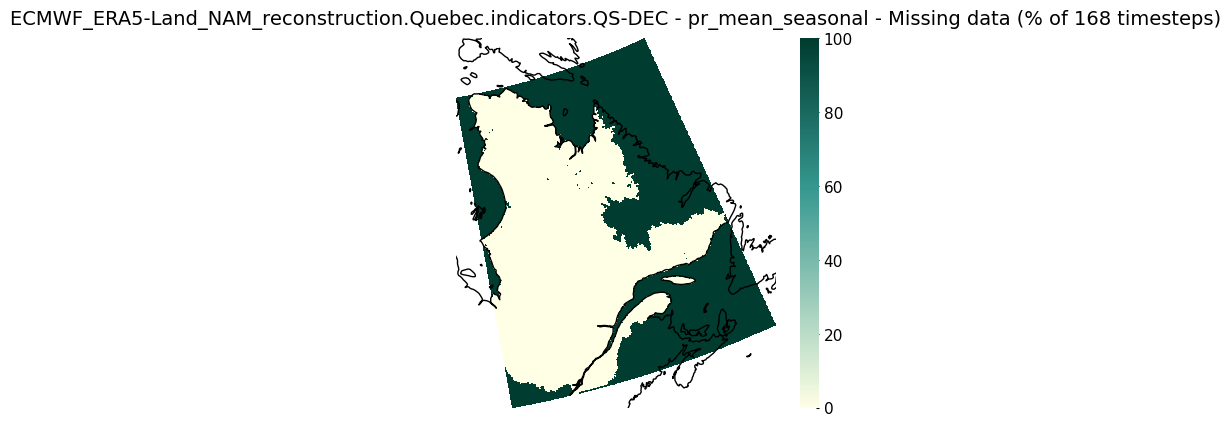

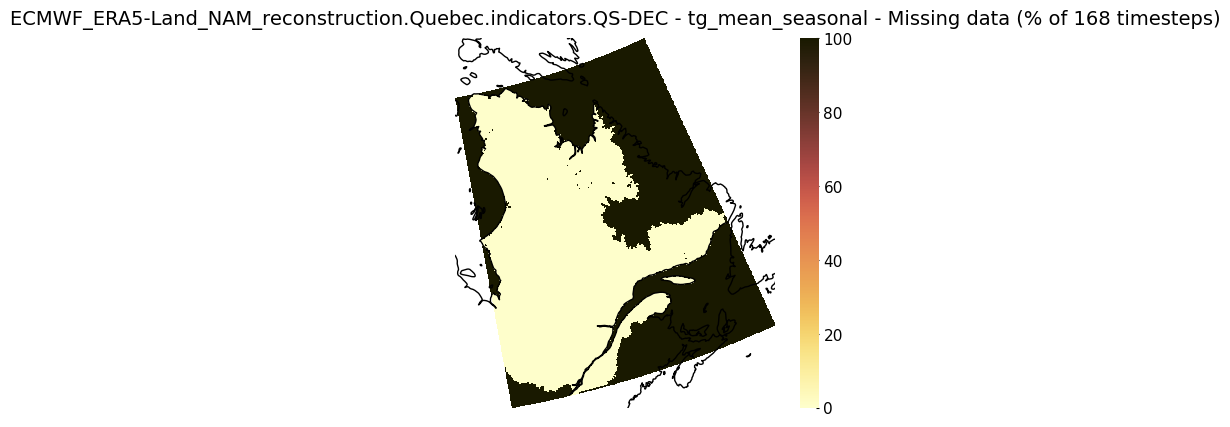

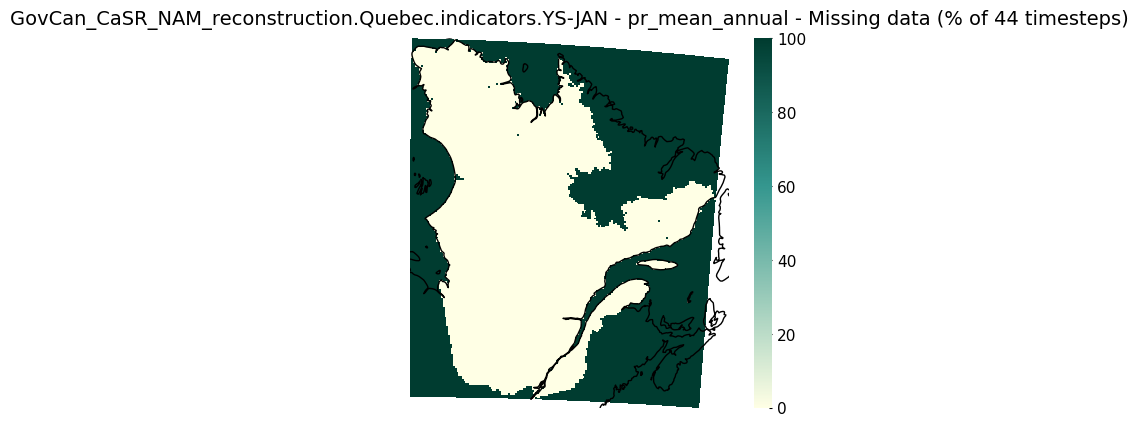

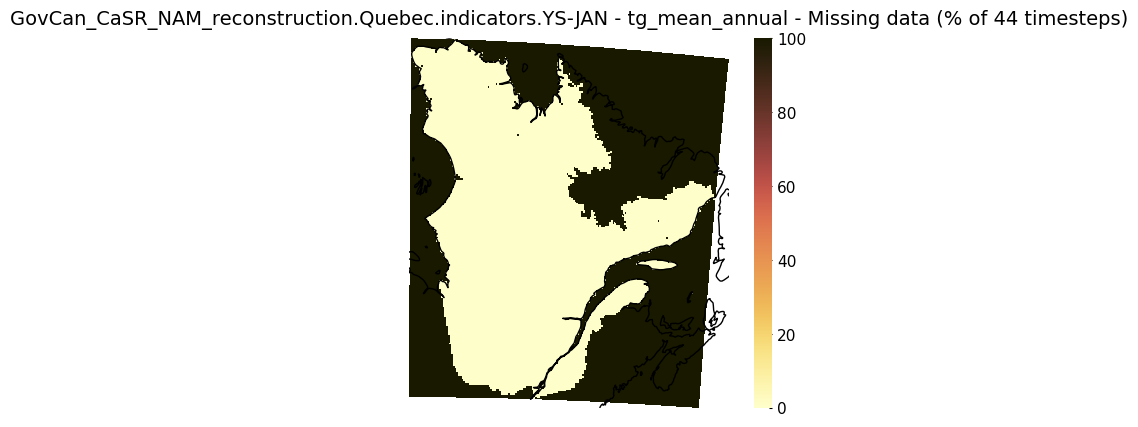

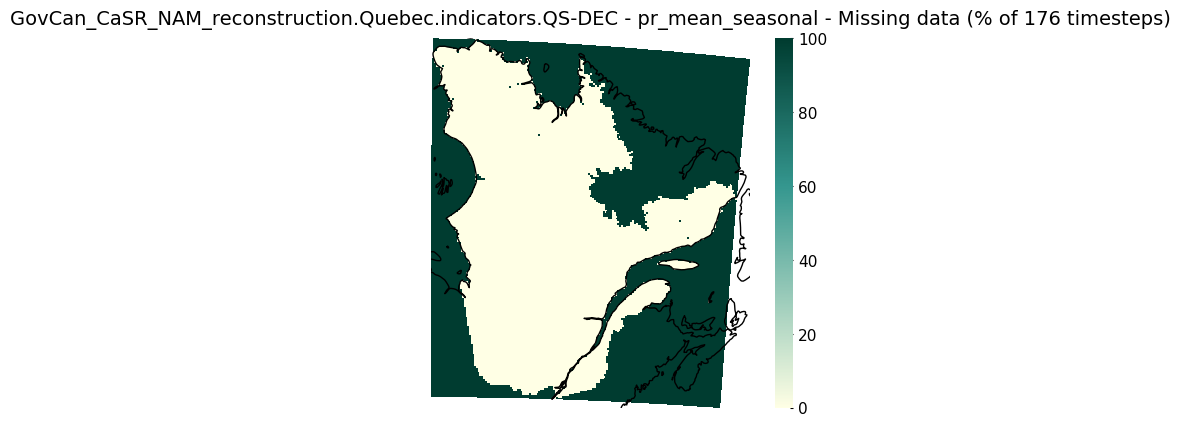

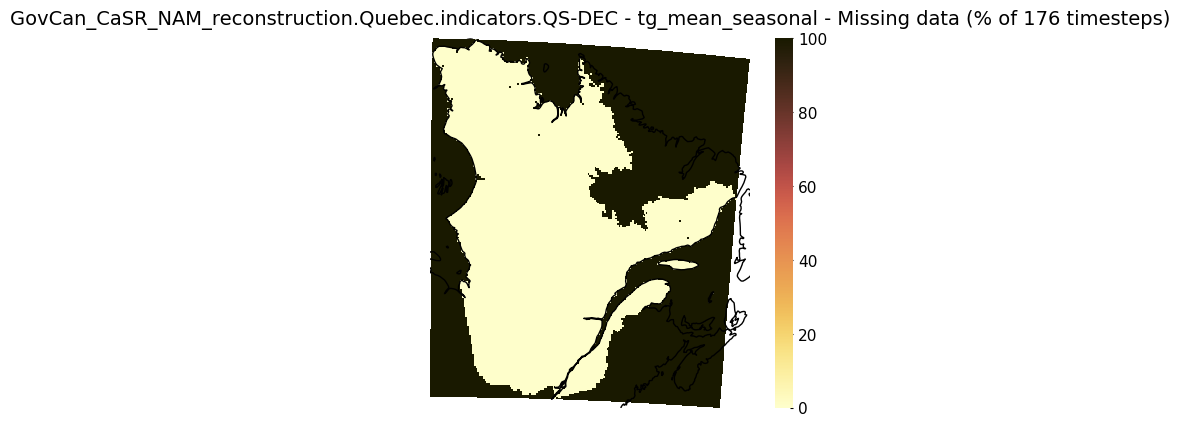

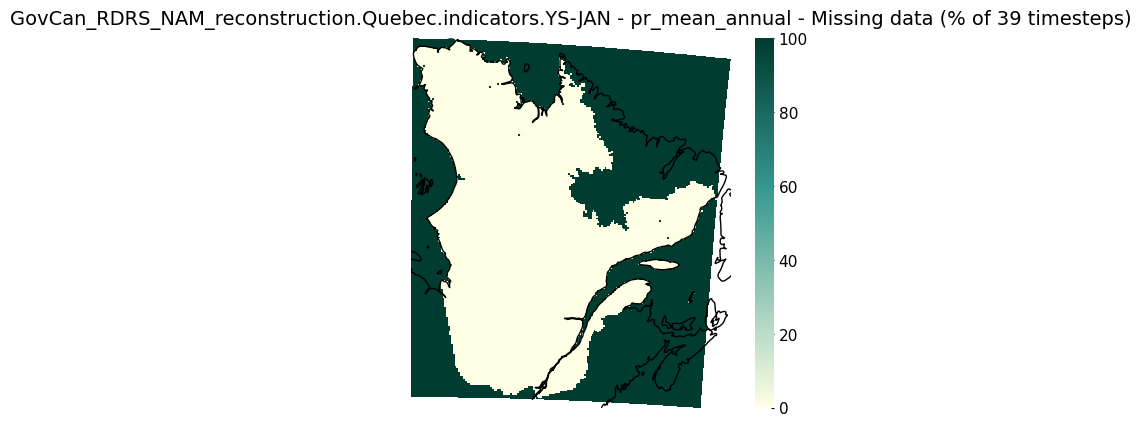

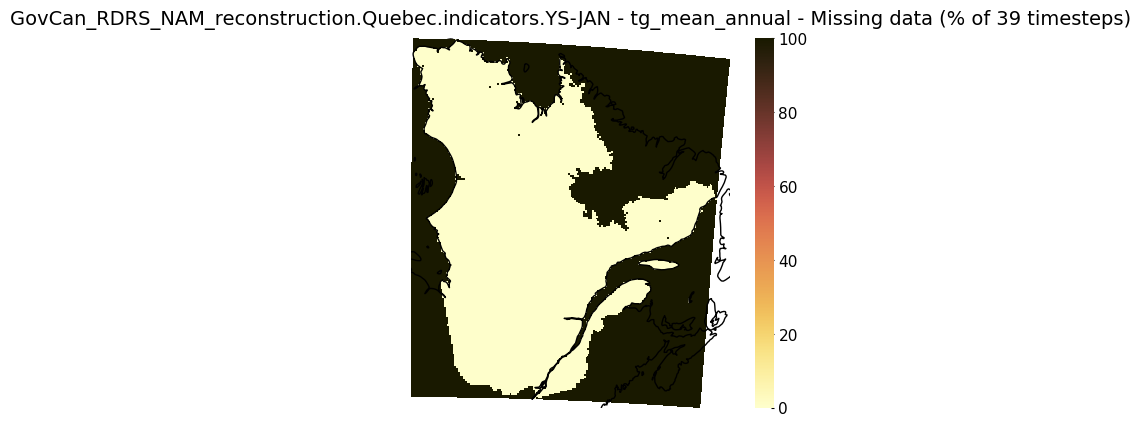

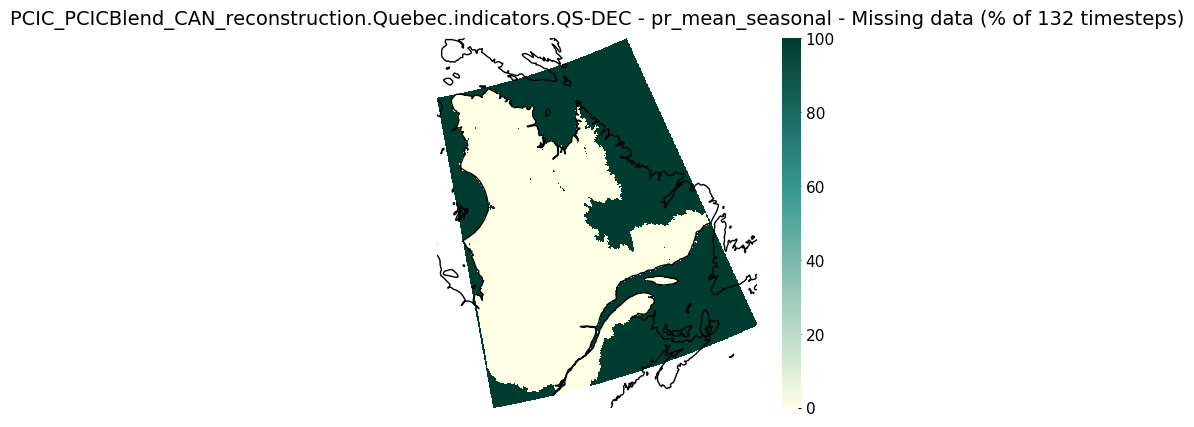

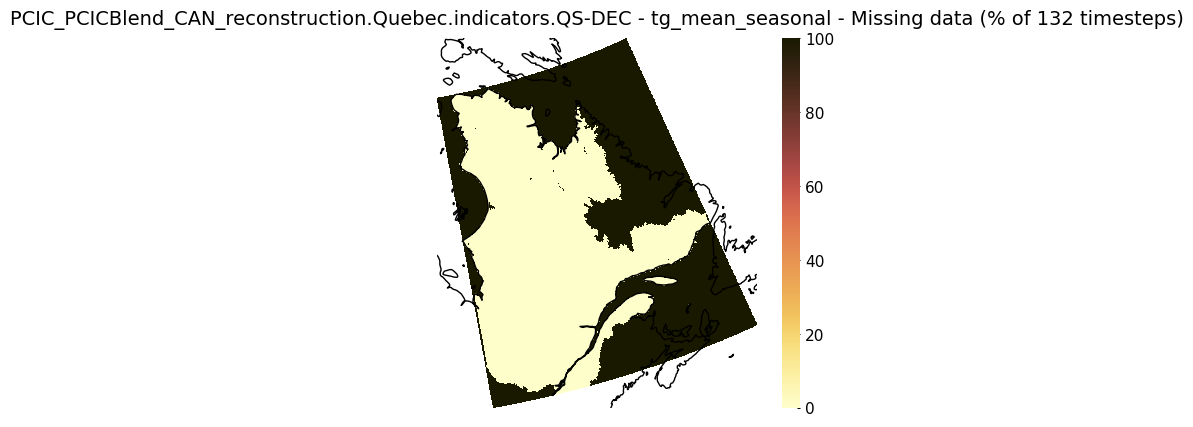

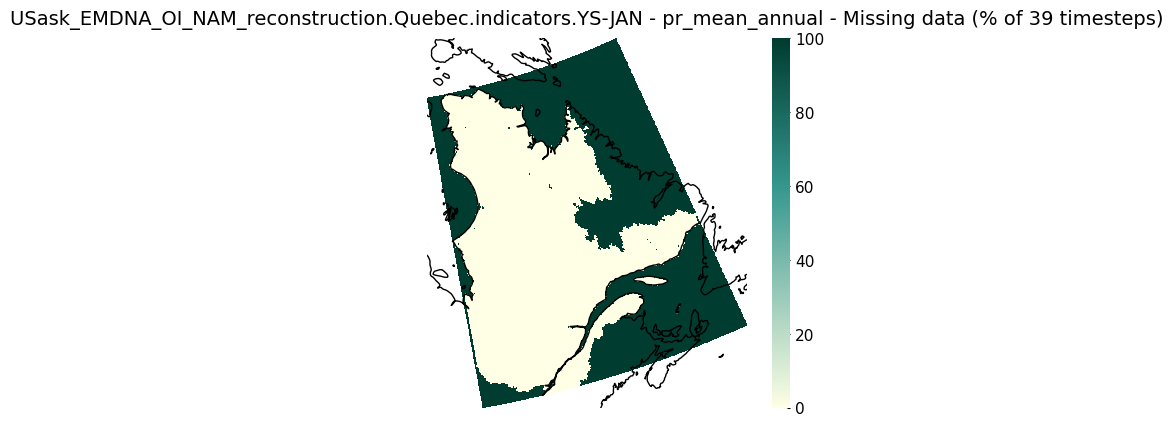

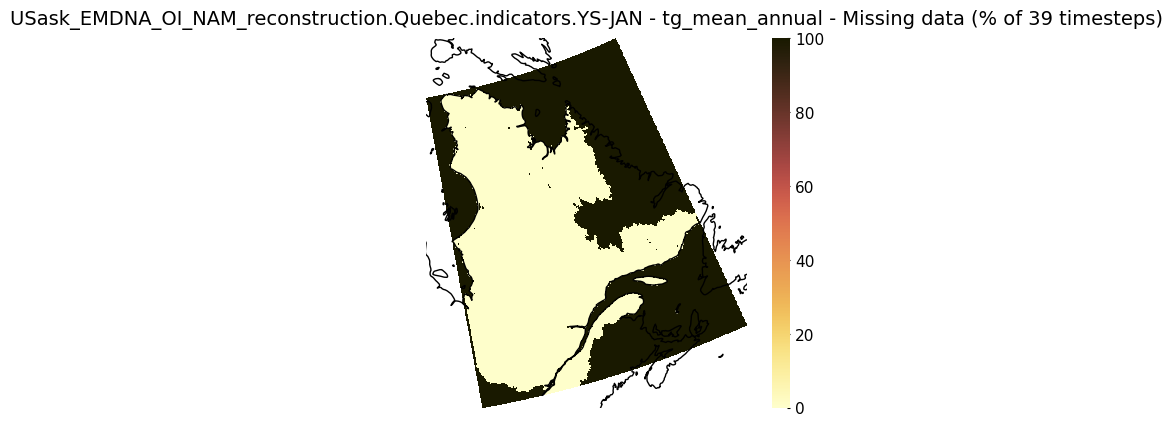

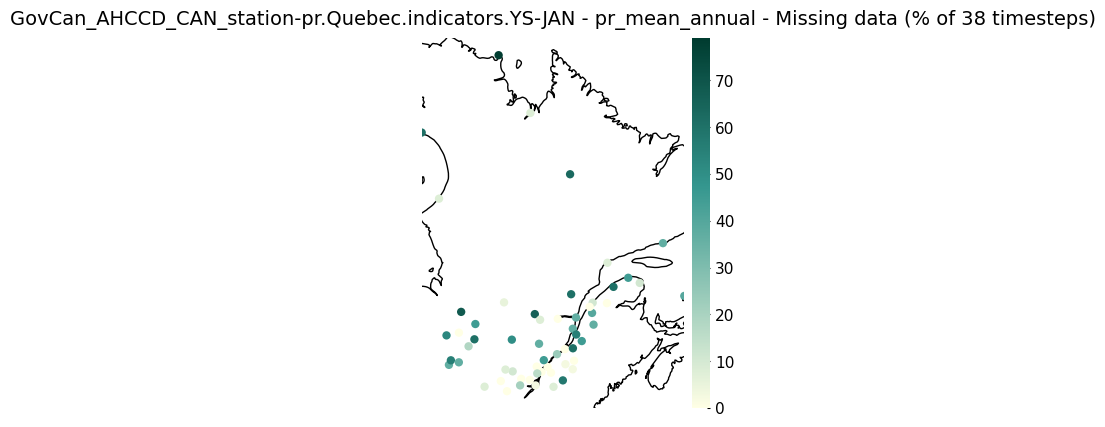

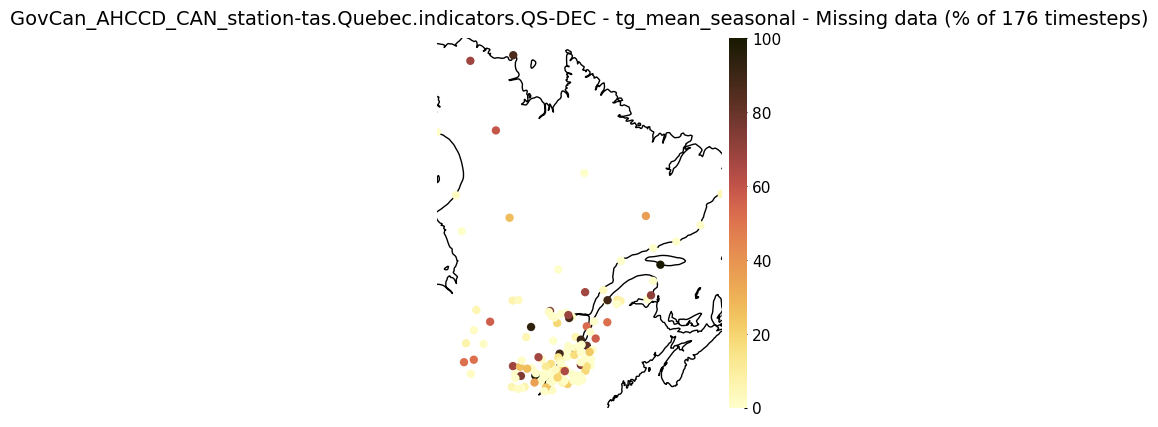

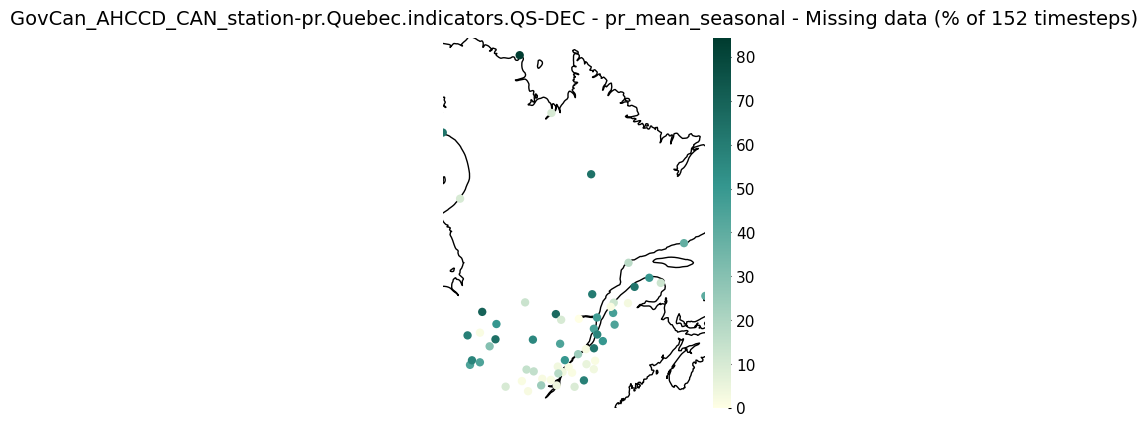

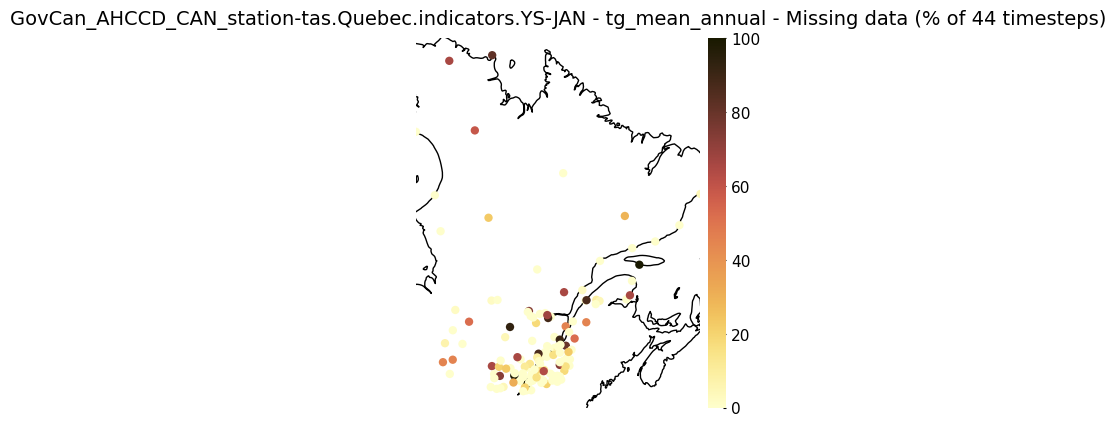

In [18]:
plot_missing_percentage(processing_level='indicators')

In [20]:
plot_missing_percentage(processing_level='climatology')


--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'
